In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/freq - 1.csv'
data = pd.read_csv(file_path)


# Gaussian

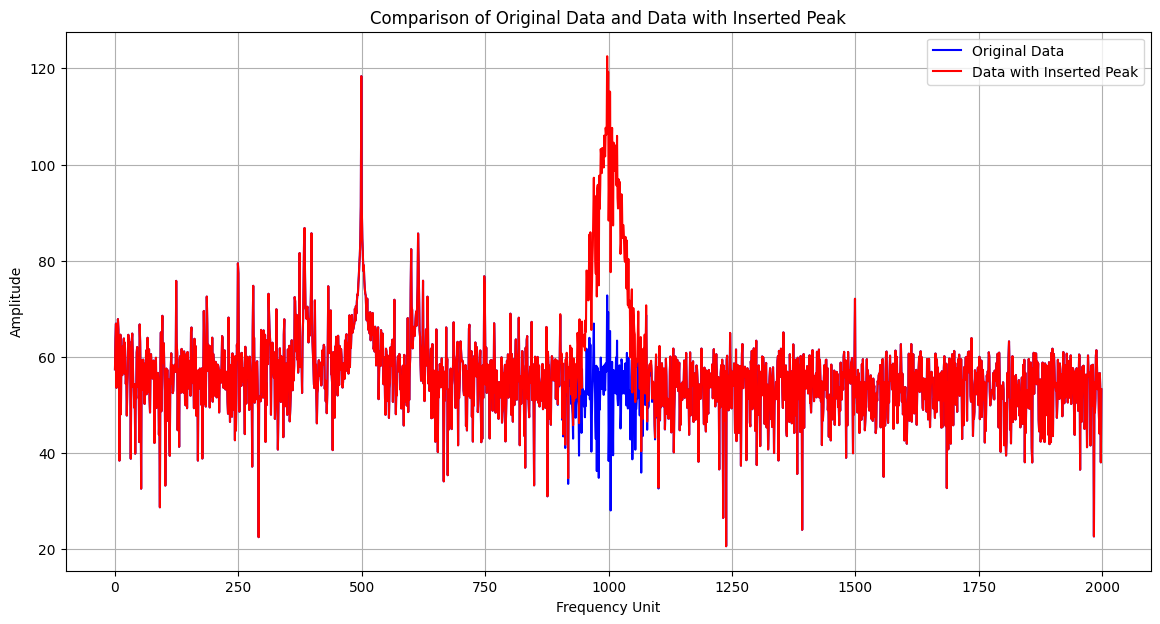

In [ ]:
a = 50
b = 1000
c = 30

indices = np.arange(len(data))

gaussian_peak = a * np.exp(-((indices - b) ** 2) / (2 * c ** 2))

data_with_peak = data.iloc[:, 0] + gaussian_peak

plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', linestyle='-', color='blue')
plt.plot(data_with_peak, label='Data with Inserted Peak', linestyle='-', color='red')
plt.title('Comparison of Original Data and Data with Inserted Peak')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Pyramid-like peak

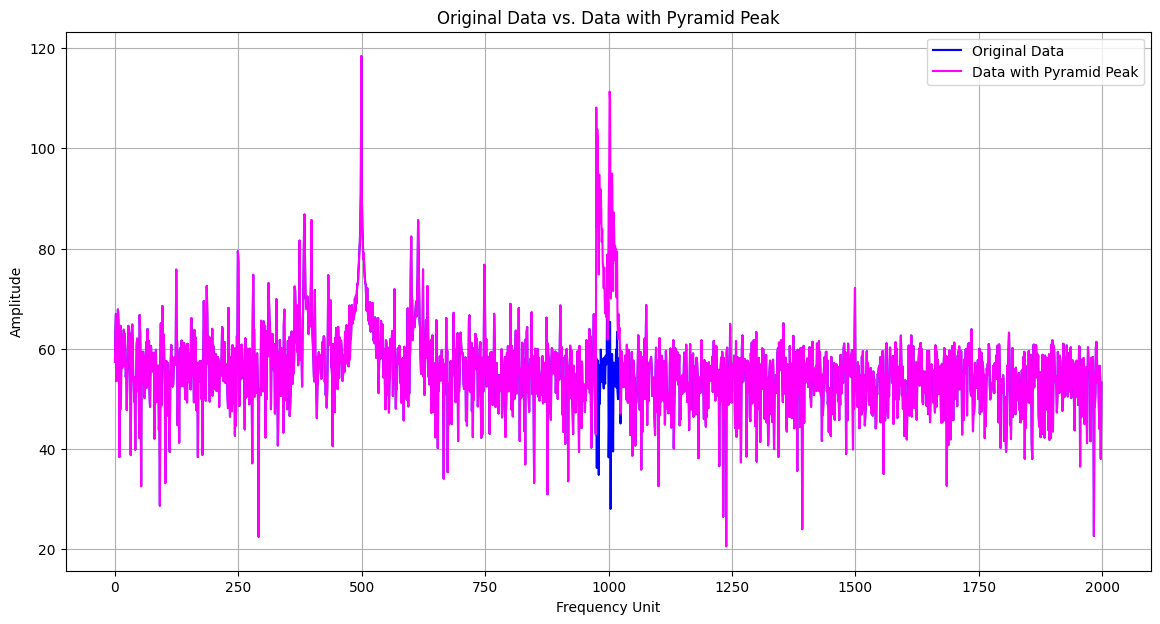

In [ ]:
peak_height = 50
peak_center = 1000
peak_width = 50

pyramid_peak = np.zeros(len(data))

slope = peak_height / (peak_width / 2)

for i in range(1, peak_width // 2 + 1):
    pyramid_peak[peak_center - i] = slope * i
    pyramid_peak[peak_center + i] = peak_height - (slope * i)

pyramid_peak[peak_center] = peak_height

data_with_pyramid_peak = data.iloc[:, 0] + pyramid_peak

plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', linestyle='-', color='blue')
plt.plot(data_with_pyramid_peak, label='Data with Pyramid Peak', linestyle='-', color='magenta')
plt.title('Original Data vs. Data with Pyramid Peak')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# Linear + Gaussinan

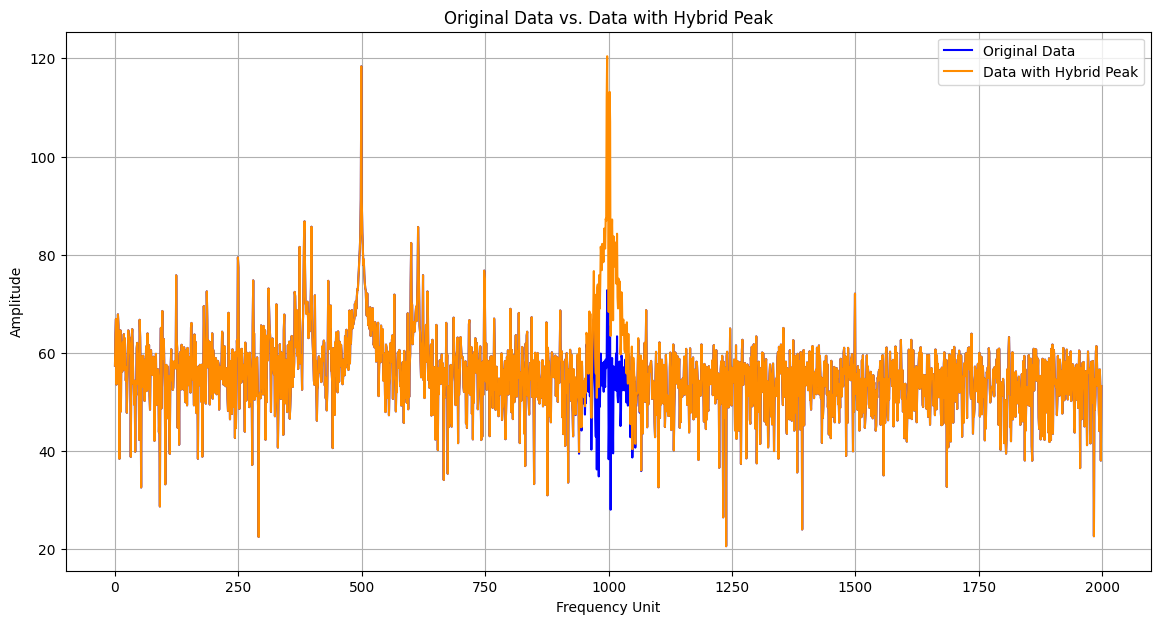

In [ ]:
peak_height_hybrid = 30
peak_center_hybrid = 1000
linear_width = 10
gaussian_width = 40

indices = np.arange(len(data))
hybrid_peak = np.zeros(len(data))

linear_slope = peak_height_hybrid / (linear_width / 2)
for i in range(1, linear_width // 2 + 1):
    hybrid_peak[peak_center_hybrid - i] = linear_slope * i
    hybrid_peak[peak_center_hybrid + i] = peak_height_hybrid - (linear_slope * i)
hybrid_peak[peak_center_hybrid] = peak_height_hybrid

gaussian_edges = peak_height_hybrid * np.exp(-((indices - peak_center_hybrid) ** 2) / (2 * (gaussian_width / 2) ** 2))

hybrid_peak += np.where(gaussian_edges > hybrid_peak, gaussian_edges, 0)

data_with_hybrid_peak = data.iloc[:, 0] + hybrid_peak

plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', linestyle='-', color='blue')
plt.plot(data_with_hybrid_peak, label='Data with Hybrid Peak', linestyle='-', color='darkorange')
plt.title('Original Data vs. Data with Hybrid Peak')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Pyramid-like peak

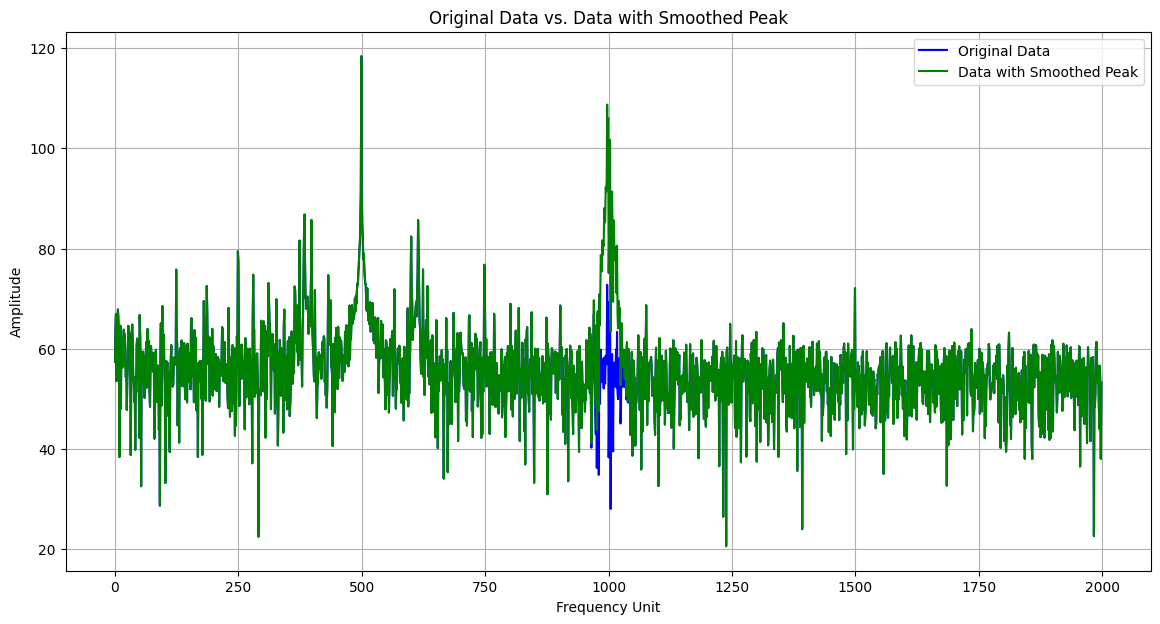

In [ ]:
from scipy.signal import convolv

peak_height_hybrid = 50
peak_center_hybrid = 1000
peak_base_width = 50

indices = np.arange(len(data))

triangle_peak = np.zeros(len(data))
half_base_width = peak_base_width // 2
start_index = peak_center_hybrid - half_base_width
triangle_peak[start_index:start_index + half_base_width] = np.linspace(0, peak_height_hybrid, half_base_width)
triangle_peak[start_index + half_base_width:start_index + peak_base_width] = np.linspace(peak_height_hybrid, 0, half_base_width)

kernel_size = 50
gaussian_kernel = np.exp(-np.linspace(-2, 2, kernel_size)**2)
gaussian_kernel /= gaussian_kernel.sum()

smoothed_peak = convolve(triangle_peak, gaussian_kernel, mode='same')

data_with_smoothed_peak = data.iloc[:, 0] + smoothed_peak

plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', linestyle='-', color='blue')
plt.plot(data_with_smoothed_peak, label='Data with Smoothed Peak', linestyle='-', color='green')
plt.title('Original Data vs. Data with Smoothed Peak')
plt.xlabel('Frequency Unit')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Creating Labled Segmnts Dataset For AnomalyBERT 29.01.2024

In [ ]:
!pip install pandas==2.1.3

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
good_data_path = 'first_3_good_dataset.csv'
bad_data_path = 'big_new_liman_BAD_dataset.csv'

good_data = pd.read_csv(good_data_path)
bad_data = pd.read_csv(bad_data_path)
gd = bad_data.to_numpy()
print(gd)

[[-0.13812809 -0.02626365 -0.05382563]
 [ 0.01021297 -0.42597255 -0.42234348]
 [ 0.06088181 -0.61582397 -0.59959821]
 ...
 [-0.53493864  0.48984588  0.4290807 ]
 [-0.49471572  0.51035472  0.43892463]
 [-0.34453468  0.35327876  0.29268276]]


In [ ]:
import pandas as pd
import numpy as np

def split_into_segments(data, segment_length=100):
    num_full_segments = len(data) // segment_length

    trimmed_data_length = num_full_segments * segment_length
    trimmed_data = data.iloc[:trimmed_data_length]

    segments = []
    for i in range(num_full_segments):
        segment_df = trimmed_data.iloc[i*segment_length:(i+1)*segment_length]
        segment_array = segment_df.to_numpy()
        fortran_segment_array = np.asfortranarray(segment_array)
        segments.append(fortran_segment_array)

    return segments

good_data_path = 'first_3_good_dataset.csv'
bad_data_path = 'big_new_liman_BAD_dataset.csv'

good_data = pd.read_csv(good_data_path, header=None, index_col=False)
bad_data = pd.read_csv(bad_data_path, header=None, index_col=False)

good_segments = split_into_segments(good_data)
bad_segments = split_into_segments(bad_data)

labeled_segments = [(segment, 0) for segment in good_segments] + \
                   [(segment, 1) for segment in bad_segments]

np.random.seed(42)
np.random.shuffle(labeled_segments)

segments_df = pd.DataFrame(labeled_segments, columns=['Segment', 'Label'])

print(segments_df['Segment'][0])
aw = segments_df['Segment'][0]
np.save('marked_final_segments', aw)

In [ ]:
segments_df['Label'].to_csv('marked_final_labels.csv', index=False)

In [ ]:
import pickle

numpy_arrays = segments_df['Segment'].tolist()

numpy_arrays_path = 'SEGMENTED5.pkl'
with open(numpy_arrays_path, 'wb') as file:
    pickle.dump(numpy_arrays, file)

print(f"NumPy arrays saved to {numpy_arrays_path}")

NumPy arrays saved to SEGMENTED3.pkl


In [ ]:
import pickle

numpy_arrays_path = 'SEGMENTEDDDD.pkl'
with open(numpy_arrays_path, 'rb') as file:
    numpy_arrays = pickle.load(file)

numpy_arrays[0]

array([[-0.54169899, -0.4105273 ,  0.26118554],
       [-0.51000557, -0.37700516,  0.31575825],
       [-0.48070549, -0.33494103,  0.37073034],
       [-0.44944409, -0.28084277,  0.42651393],
       [-0.40615221, -0.22039541,  0.47903524],
       [-0.34641072, -0.16295799,  0.51959049],
       [-0.2780465 , -0.11186981,  0.54434435],
       [-0.21278833, -0.06415439,  0.55882169],
       [-0.15429065, -0.01843521,  0.57030945],
       [-0.0983451 ,  0.02257812,  0.58014096],
       [-0.04247586,  0.0585607 ,  0.586981  ],
       [ 0.0102927 ,  0.09480609,  0.59366044],
       [ 0.05740308,  0.1352251 ,  0.60481898],
       [ 0.1013782 ,  0.17598455,  0.61874315],
       [ 0.14623794,  0.21122451,  0.62721921],
       [ 0.192773  ,  0.24338959,  0.62496547],
       [ 0.2402799 ,  0.2823355 ,  0.61538243],
       [ 0.2906457 ,  0.33340231,  0.60517168],
       [ 0.34691279,  0.39062587,  0.59636491],
       [ 0.40789199,  0.44336032,  0.58578085],
       [ 0.46707167,  0.48603124,  0.569

In [ ]:
with open('SEGMENTED5.pkl', 'rb') as file:
  test_data = pickle.load(file)


gh = test_data[0]
np.save('newarr2.np', gh)

In [ ]:
ass = np.load('/content/segmented_predictions.npy')
np.set_printoptions(suppress=True, precision=6)
avg = []
minn = []
maxx = []

for i in ass:
  mi = np.min(i)
  ma = np.max(i)
  av = np.mean(i)
  avg.append(av)
  maxx.append(ma)
  minn.append(mi)

In [ ]:
print(avg)

[0.09729249, 0.06622683, 0.064729884, 0.05945987, 0.12147314, 0.09906787, 0.05580732, 0.057698265, 0.10567417, 0.09676511, 0.040778313, 0.06849905, 0.084678285, 0.10891119, 0.043356124, 0.051995877, 0.07186026, 0.05310486, 0.047868475, 0.06410716, 0.104867175, 0.08557829, 0.10049141, 0.06316963, 0.11173719, 0.04755886, 0.086518615, 0.089267686, 0.09864474, 0.109109566, 0.0775541, 0.06230977, 0.0931217, 0.07012855, 0.0694114, 0.080101855, 0.09794716, 0.12095806, 0.09242747, 0.08715766, 0.061842665, 0.06904313, 0.06628137, 0.041312203, 0.06613731, 0.064083196, 0.07073317, 0.06693667, 0.034531225, 0.06495053, 0.06197669, 0.047152195, 0.04418016, 0.09027508, 0.08093901, 0.08309569, 0.07530827, 0.040800005, 0.05965187, 0.09131087, 0.048325952, 0.112908214, 0.11032427, 0.06665261, 0.059982233, 0.063494824, 0.083345935, 0.111112736, 0.06826609, 0.031633187, 0.04251845, 0.10557482, 0.11575567, 0.1101018, 0.10277008, 0.09067031, 0.07272231, 0.030816589, 0.10910743, 0.06550161]


In [ ]:
print(maxx)

[0.36615467, 0.3396158, 0.27455622, 0.25662658, 0.4499325, 0.86849076, 0.8199065, 0.6056701, 0.35740098, 0.52788025, 0.17596775, 0.98152024, 0.39746872, 0.5910989, 0.17628898, 0.3653715, 0.38622943, 0.87450427, 0.20176277, 0.21285173, 0.4839856, 0.59965485, 0.99601257, 0.26010892, 0.5742886, 0.16314884, 0.94764066, 0.28740147, 0.4660661, 0.6164777, 0.5140373, 0.3540762, 0.3001155, 0.49653894, 0.2517323, 0.9964934, 0.5949732, 0.7143431, 0.31153435, 0.35052407, 0.20001575, 0.27084997, 0.29431403, 0.1447918, 0.23571545, 0.48204443, 0.40539685, 0.31993094, 0.18654262, 0.22067823, 0.91696095, 0.15649772, 0.30094323, 0.25745636, 0.4423831, 0.50313777, 0.296317, 0.40984246, 0.32029596, 0.27623588, 0.2833635, 0.680541, 0.52340734, 0.5097266, 0.26027608, 0.19927432, 0.6328319, 0.83661735, 0.45175496, 0.16124108, 0.28137475, 0.40556496, 0.63812685, 0.77716774, 0.9457364, 0.49441546, 0.543775, 0.14852457, 0.6537621, 0.31706586]


In [ ]:
ans = segments_df['Label']
ans.to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1]

In [ ]:
df_res = pd.DataFrame({'Max': maxx, 'Avg': avg, 'Label':ans})
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [ ]:
df_res

,Max,Avg,Label
0,0.366154671,0.097292490,0
1,0.339615792,0.066226833,0
2,0.274556220,0.064729884,0
3,0.256626576,0.059459869,0
4,0.449932486,0.121473141,0
...,...,...,...
75,0.494415462,0.090670310,0
76,0.543775022,0.072722308,1
77,0.148524567,0.030816589,1
78,0.653762102,0.109107427,0


# Creating Plots to Visualise the results of AnomalyBert

In [ ]:
df_res.to_csv('summary.csv')

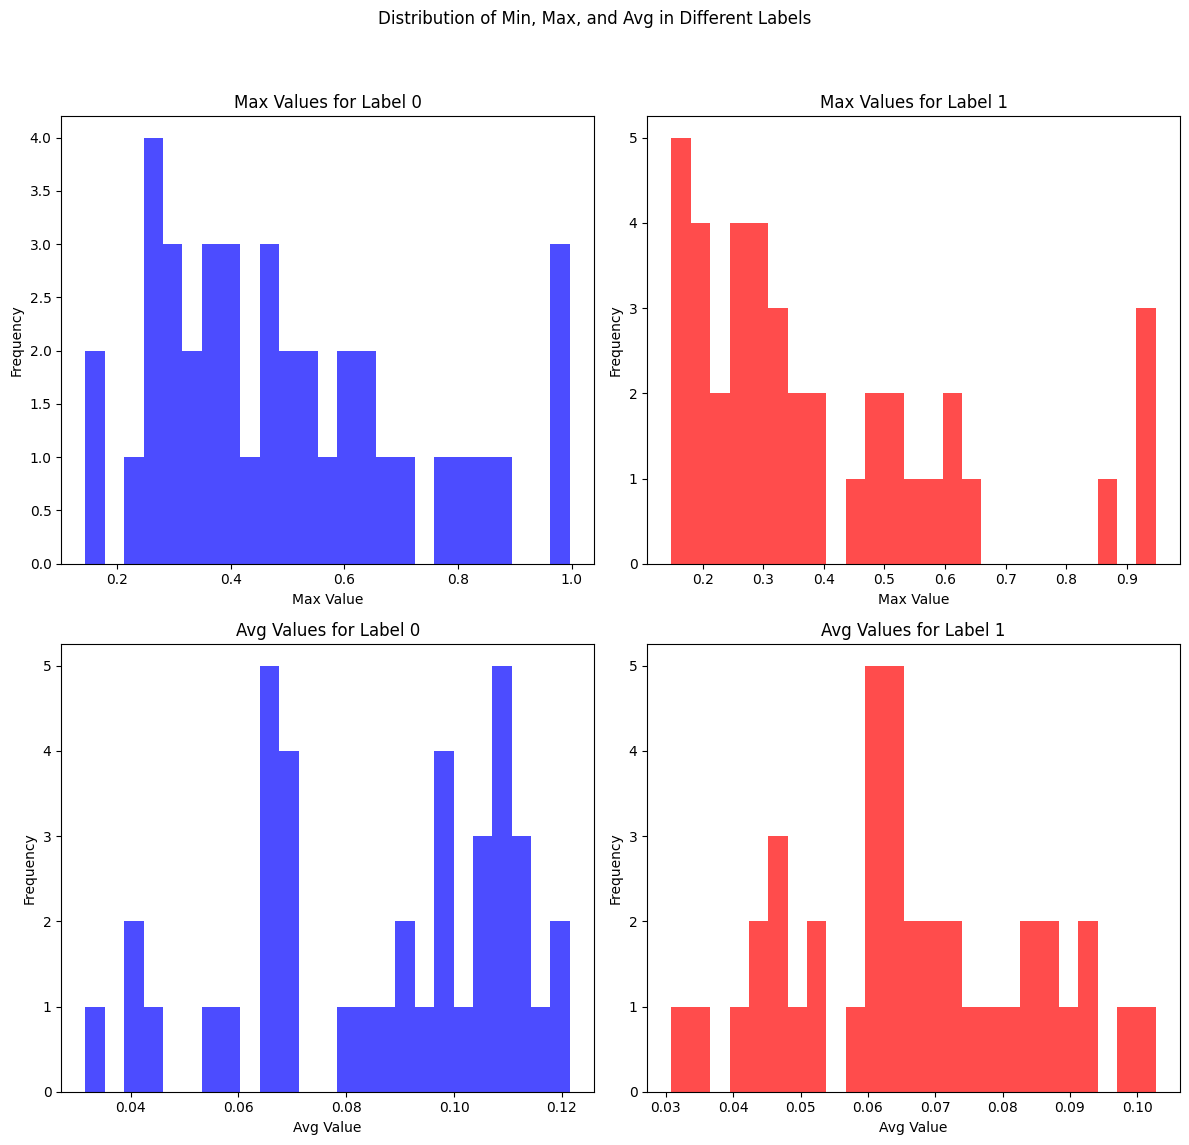

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_res

df_label_0 = df[df['Label'] == 0]
df_label_1 = df[df['Label'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Distribution of Min, Max, and Avg in Different Labels')


axes[0, 0].hist(df_label_0['Max'], bins=25, color='blue', alpha=0.7)
axes[0, 0].set_title('Max Values for Label 0')
axes[0, 0].set_xlabel('Max Value')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df_label_1['Max'], bins=25, color='red', alpha=0.7)
axes[0, 1].set_title('Max Values for Label 1')
axes[0, 1].set_xlabel('Max Value')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df_label_0['Avg'], bins=25, color='blue', alpha=0.7)
axes[1, 0].set_title('Avg Values for Label 0')
axes[1, 0].set_xlabel('Avg Value')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df_label_1['Avg'], bins=25, color='red', alpha=0.7)
axes[1, 1].set_title('Avg Values for Label 1')
axes[1, 1].set_xlabel('Avg Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
max_min = builtins.min(df['Max'].min(), df['Max'].min())
max_max = builtins.max(df['Max'].max(), df['Max'].max())

avg_min = builtins.min(df['Avg'].min(), df['Avg'].min())
avg_max = builtins.max(df['Avg'].max(), df['Avg'].max())

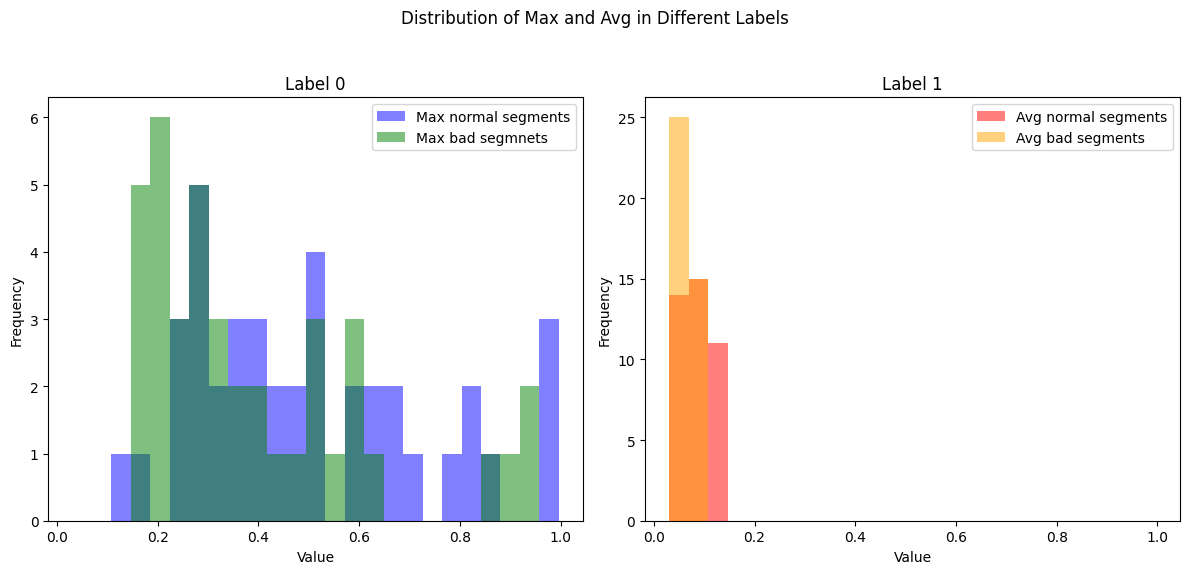

In [ ]:
import builtins

df = df_res

df_label_0 = df[df['Label'] == 0]
df_label_1 = df[df['Label'] == 1]

max_min = builtins.min(df['Max'].min(), df['Avg'].min())
max_max = builtins.max(df['Max'].max(), df['Avg'].max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribution of Max and Avg in Different Labels')

axes[0].hist(df_label_0['Max'], bins=25, color='blue', alpha=0.5, range=(max_min, max_max), label='Max normal segments')
axes[0].hist(df_label_1['Max'], bins=25, color='green', alpha=0.5, range=(max_min, max_max), label='Max bad segmnets')
axes[0].set_title('Label 0')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(df_label_0['Avg'], bins=25, color='red', alpha=0.5, range=(max_min, max_max), label='Avg normal segments')
axes[1].hist(df_label_1['Avg'], bins=25, color='orange', alpha=0.5, range=(max_min, max_max), label='Avg bad segments')
axes[1].set_title('Label 1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
def compute_accuracy(max_values, labels):
    if len(max_values) != len(labels):
        raise ValueError("The lengths of max_values and labels must be the same.")

    predictions = [1 if value >= 0.08 else 0 for value in max_values]
    correct_predictions = sum(pred == label for pred, label in zip(predictions, labels))

    accuracy = correct_predictions / len(labels)
    return accuracy

accuracy = compute_accuracy(avg, ans)
print("Accuracy:", accuracy)

# Checking Parameters of the Arrays

In [ ]:
asss = np.load('/content/ftryy.npy')

is_fortran_order = asss.flags['F_CONTIGUOUS']

print("Is the array in Fortran order:", is_fortran_order)
asss

Is the array in Fortran order: True


array([[ 0.        ,  1.        ,  2.        ],
       [ 0.26071964,  0.27565589,  0.15744365],
       [ 0.26340829,  0.41478762, -0.0421972 ],
       ...,
       [-0.4767957 , -0.35596269,  0.39688603],
       [-0.44670823, -0.30752211,  0.45178191],
       [-0.40304697, -0.24775387,  0.50273685]])

In [ ]:
segments_df['Segment'][0]

array([[ 0.66960559,  0.50382655, -0.10812802],
       [ 0.6418352 ,  0.46564736, -0.14434606],
       [ 0.61453196,  0.42947774, -0.19056666],
       [ 0.58782078,  0.39629298, -0.24293898],
       [ 0.56229696,  0.36121824, -0.29493601],
       [ 0.53868688,  0.31701002, -0.34721917],
       [ 0.51247041,  0.26166098, -0.40371505],
       [ 0.47470905,  0.20032792, -0.45979061],
       [ 0.42128504,  0.13988714, -0.50290892],
       [ 0.35814346,  0.08435325, -0.52723789],
       [ 0.29464314,  0.03538335, -0.54083779],
       [ 0.23440453, -0.00694684, -0.55455854],
       [ 0.17578956, -0.04562345, -0.56938061],
       [ 0.11876656, -0.0855075 , -0.58000394],
       [ 0.06641758, -0.1280333 , -0.58655469],
       [ 0.01984316, -0.16930293, -0.59517808],
       [-0.02410062, -0.20569568, -0.60778255],
       [-0.06873552, -0.23923357, -0.61817338],
       [-0.1144898 , -0.27513514, -0.62035223],
       [-0.16163519, -0.31638392, -0.6157767 ],
       [-0.21322863, -0.36328902, -0.609

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

csv_file_path = '/content/appended_df.csv'

data_frame = pd.read_csv(csv_file_path)

selected_columns = ['ampl_A', 'ampl_B', 'ampl_C']
currents_data = data_frame[selected_columns]

currents_array = currents_data.to_numpy()

currents_array.shape


(4096, 3)

# Creating Big Datasetsa

In [ ]:
import os
import pandas as pd
import json
import ast

def process_files_in_directory(directory_path):

    combined_df = pd.DataFrame()

    files = sorted(os.listdir(directory_path))

    for i in range(0, len(files), 3):
        file_group = files[i:i+3]

        if len(file_group) != 3:
            continue

        group_data = []
        for file_name in file_group:
            file_path = os.path.join(directory_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
                data_list = ast.literal_eval(data)
                group_data.append([item[1] for item in data_list])

        group_df = pd.DataFrame(group_data).transpose()

        combined_df = pd.concat([combined_df, group_df], ignore_index=True)

    return combined_df

directory_path = '/content/drive/MyDrive/BAD LIMAN'
big_dataset = process_files_in_directory(directory_path)
print(big_dataset)

             0         1         2
0    -0.138128 -0.026264 -0.053826
1     0.010213 -0.425973 -0.422343
2     0.060882 -0.615824 -0.599598
3     0.073999 -0.596212 -0.578234
4     0.109911 -0.545870 -0.523416
...        ...       ...       ...
4091 -0.551883  0.530366  0.471002
4092 -0.527607  0.473106  0.420796
4093 -0.534939  0.489846  0.429081
4094 -0.494716  0.510355  0.438925
4095 -0.344535  0.353279  0.292683

[4096 rows x 3 columns]


In [ ]:
big_dataset.to_csv('big_new_liman_BAD_dataset.csv', index=False)


# Create Good Dataset from First Three Files

In [ ]:
import os
import pandas as pd
import json
import ast

def process_first_three_files(directory_path):
    combined_df = pd.DataFrame()

    files = sorted(os.listdir(directory_path))

    if len(files) < 3:
        raise ValueError("Not enough files")

    file_group = files[:3]

    group_data = []
    for file_name in file_group:
        file_path = os.path.join(directory_path, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)
            data_list = ast.literal_eval(data)
            group_data.append([item[1] for item in data_list])

    combined_df = pd.DataFrame(group_data).transpose()

    return combined_df

directory_path = '/content/drive/MyDrive/signal_json'
dataset = process_first_three_files(directory_path)
print(dataset)


             0         1         2
0     0.260720  0.275656  0.157444
1     0.263408  0.414788 -0.042197
2     0.323941  0.567702 -0.079078
3     0.404065  0.587676 -0.058988
4     0.457177  0.498793 -0.094657
...        ...       ...       ...
4091  0.115035  0.212525  0.602713
4092  0.157721  0.291655  0.603527
4093  0.220296  0.373776  0.654219
4094  0.276168  0.360055  0.637498
4095  0.285449  0.277879  0.446777

[4096 rows x 3 columns]


In [ ]:
dataset.to_csv('first_3_good_dataset.csv', index=False)

# Create Bad Dataset from First Three Files*

In [ ]:
import pandas as pd
import numpy as np

csv_file_path = '/content/big_new_liman_BAD_dataset.csv'

df = pd.read_csv(csv_file_path)
numpy_array = df.to_numpy()

print(numpy_array.shape)

(4096, 3)


In [ ]:
import os
import pandas as pd
import json
import ast

def process_files_in_directory(directory_path):

    combined_df = pd.DataFrame()

    files = sorted(os.listdir(directory_path))

    for i in range(0, len(files), 3):
        file_group = files[i:i+3]

        if len(file_group) != 3:
            continue

        group_data = []
        for file_name in file_group:
            file_path = os.path.join(directory_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
                data_list = ast.literal_eval(data)
                group_data.append([item[1] for item in data_list])

        group_df = pd.DataFrame(group_data).transpose()

        combined_df = pd.concat([combined_df, group_df], ignore_index=True)

    return combined_df


directory_path = '/content/drive/MyDrive/signal_json'
big_dataset = process_files_in_directory(directory_path)
print(big_dataset.head())


          0         1         2
0  0.260720  0.275656  0.157444
1  0.263408  0.414788 -0.042197
2  0.323941  0.567702 -0.079078
3  0.404065  0.587676 -0.058988
4  0.457177  0.498793 -0.094657


In [ ]:
np.save('BAD_BNLD.npy', numpy_array)

In [ ]:
file_path = '/content/state_dict_results.npy 3'
data = np.load(file_path)

print("Data Shape:", data.shape)

Data Shape: (4096, 1)


# Dataset Creation With Sliding Window and Fourier Transform

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft
from sklearn.utils import shuffle

In [ ]:
def process_and_transform_data_overlapping(good_file_path, bad_file_path, window_length):
    """
    Process the good and bad time series data with overlapping segments. Applies Fourier transform and
    creates a labeled dataset with amplitude of frequency components for each phase.
    """

    def process_file(file_path, label):
        data = pd.read_csv(file_path)
        amplitudes = []

        for start in range(0, len(data) - window_length):
            segment = data.iloc[start:start + window_length]

            transformed_segments = [np.abs(fft(segment[col].values)) for col in segment.columns]

            for freq_idx in range(len(transformed_segments[0])):
                freq_amplitude = [transformed_segments[i][freq_idx] for i in range(len(transformed_segments))]
                amplitudes.append((*freq_amplitude, label))

        return amplitudes

    good_amplitudes = process_file(good_file_path, 0)
    bad_amplitudes = process_file(bad_file_path, 1)

    all_amplitudes = good_amplitudes + bad_amplitudes
    shuffled_amplitudes = shuffle(all_amplitudes)

    # Convert to DataFrame
    column_names = [f'phase_{i+1}_amplitude' for i in range(len(shuffled_amplitudes[0]) - 1)] + ['label']
    amplitude_data = pd.DataFrame(shuffled_amplitudes, columns=column_names)

    return amplitude_data

good_file_path = '/content/first_3_good_dataset.csv'
bad_file_path = '/content/big_new_liman_BAD_dataset.csv'
window_length = 50

overlapping_amplitude_data_new = process_and_transform_data_overlapping(good_file_path, bad_file_path, window_length)

overlapping_amplitude_data_new.shape, overlapping_amplitude_data_new.head()


((404600, 4),
    phase_1_amplitude  phase_2_amplitude  phase_3_amplitude  label
 0           0.613319           0.366800           0.973417      0
 1           0.032117           0.141774           0.648401      0
 2           1.008324           0.505984           0.905837      0
 3           0.227945           0.186330           0.181326      1
 4           0.290773           0.209181           0.330267      1)

In [ ]:
def process_and_transform_data_non_overlapping(good_file_path, bad_file_path, window_length):
    """
    Function to process the good and bad time series data with non-overlapping segments.
    Applies Fourier transform and creates a labeled dataset with amplitude of frequency components for each phase.
    """

    def process_file(file_path, label):
        data = pd.read_csv(file_path)

        amplitudes = []

        for start in range(0, len(data) - window_length + 1, window_length):
            segment = data.iloc[start:start + window_length]
            transformed_segments = [np.abs(fft(segment[col].values)) for col in segment.columns]

            for freq_idx in range(len(transformed_segments[0])):
                freq_amplitude = [transformed_segments[i][freq_idx] for i in range(len(transformed_segments))]
                amplitudes.append((*freq_amplitude, label))

        return amplitudes

    good_amplitudes = process_file(good_file_path, 0)
    bad_amplitudes = process_file(bad_file_path, 1)

    all_amplitudes = good_amplitudes + bad_amplitudes
    shuffled_amplitudes = shuffle(all_amplitudes)

    column_names = [f'phase_{i+1}_amplitude' for i in range(len(shuffled_amplitudes[0]) - 1)] + ['label']
    amplitude_data = pd.DataFrame(shuffled_amplitudes, columns=column_names)

    return amplitude_data

non_overlapping_amplitude_data = process_and_transform_data_non_overlapping(good_file_path, bad_file_path, window_length)

non_overlapping_amplitude_data.shape, corrected_non_overlapping_amplitude_data.head()

((8100, 4),
    phase_1_amplitude  phase_2_amplitude  phase_3_amplitude  label
 0           1.707678           1.812691           1.440463      0
 1           0.925411           0.823055           0.806929      1
 2           0.036442           0.051202           0.146695      1
 3           0.582901           0.443678           0.217691      0
 4           1.197481           0.999104           0.948068      1)

In [ ]:
def process_and_transform_data_shuffled_segments_only(good_file_path, bad_file_path, window_length):
    """
    Process the good and bad time series data, apply Fourier transform, and create a dataset with
    shuffled segments (not the data within them), calculating the amplitude of frequency components for each phase.
    """

    def process_file(file_path, label):
        data = pd.read_csv(file_path)
        segments = []

        for start in range(0, len(data) - window_length):
            segment = data.iloc[start:start + window_length]

            transformed_segments = [np.abs(fft(segment[col].values)) for col in segment.columns]
            segments.append((transformed_segments, label))

        return segments

    good_segments = process_file(good_file_path, 0)
    bad_segments = process_file(bad_file_path, 1)

    all_segments = good_segments + bad_segments
    shuffled_segments = shuffle(all_segments)

    amplitude_data_rows = []
    for transformed_segments, label in shuffled_segments:
        for freq_idx in range(len(transformed_segments[0])):
            freq_amplitude = [transformed_segments[i][freq_idx] for i in range(len(transformed_segments))]
            amplitude_data_rows.append((*freq_amplitude, label))

    column_names = [f'phase_{i+1}_amplitude' for i in range(len(amplitude_data_rows[0]) - 1)] + ['label']
    amplitude_data = pd.DataFrame(amplitude_data_rows, columns=column_names)

    return amplitude_data

shuffled_segments_amplitude_data = process_and_transform_data_shuffled_segments_only(good_file_path, bad_file_path, window_length)

shuffled_segments_amplitude_data.shape, shuffled_segments_amplitude_data['label'].value_counts()



((404600, 4),
 1    202300
 0    202300
 Name: label, dtype: int64)

In [ ]:
shuffled_segments_amplitude_data.to_csv('suffled_data_3bad_3good.csv', index=False)

In [ ]:
data = shuffled_segments_amplitude_data.drop('label', axis=1)
labels = shuffled_segments_amplitude_data['label']

In [ ]:
data.to_csv('only_data_suffled_data_3bad_3good.csv', index=False)
labels.to_csv('labels_suffled_data_3bad_3good.csv', index=False)